# Note:
This is a sample notebook containing the python script that was used during my project. During the project, the following process was repeated across each of the day's of observation. For simplicity and ease of reading this noteboook will focus upon the 16th of August 2023 as it was one of the best days of observation. 

On this day of observation, the telescope started it's data collection from the pole of the planet.

Important point: This notebook will use data not provided in the GitHub repo, this is necessary to show the outcomes of the project. Below is an example cell that provide instructions on how to load the data provided in the repo, in case you wish to run this code on your machine, if so ensure you change the appropriate filenames.

In [2]:
# Importing Libraries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
import h3ppy

## Important Physics Point!
The calculation of temperature and column density of Jupiter's upper atmosphere is completed via H3+. The python program below will use specific H3+ emission lines for it's calculation. When choosing these emission lines it was important to consider if these lines are visible in both the equatorial and polar regions of the planet. 

As the equatorial region of Jupiter's upper atmosphere recieves more sunlight than the pole certain emission lines are rendered invisible to our telescope due to sunlight interference. 

The following lines have been chosen because of there visibility in both areas of the planet:

order 2 = 1800 - 1900

order 3 = 1500 - 1580

order 4 = 1170 - 1220

order 7 = 1100 - 1125

In [4]:
# Loading all of the orders 
fits_image_order2 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Jupiter\jup.018\jup.018.order.02.fits.gz'

fits_units_order2 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Calibration\wavelength.order.2.fits.gz'

fits_image_order3 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Jupiter\jup.018\jup.018.order.03.fits.gz'

fits_units_order3 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Calibration\wavelength.order.3.fits.gz'

fits_image_order4 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Jupiter\jup.018\jup.018.order.04.fits.gz'

fits_units_order4 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Calibration\wavelength.order.4.fits.gz'

fits_image_order5 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Jupiter\jup.018\jup.018.order.05.fits.gz'

fits_units_order5 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Calibration\wavelength.order.5.fits.gz'

fits_image_order7 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Jupiter\jup.018\jup.018.order.07.fits.gz'

fits_units_order7 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Calibration\wavelength.order.7.fits.gz'


## Calculating Temperature and Column Density using a single H3+ emission line

<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Furio\AppData\Local\Temp\ipykernel_9408\829721649.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel(h3p.ylabel(prefix = '$\mu$'))
[h3ppy] Estimated density = 7.37E+16 m-2
[h3ppy] Fit failed to converge - solution is numerially unstable 


D:\Apps\anaconda3\Lib\site-packages\h3ppy


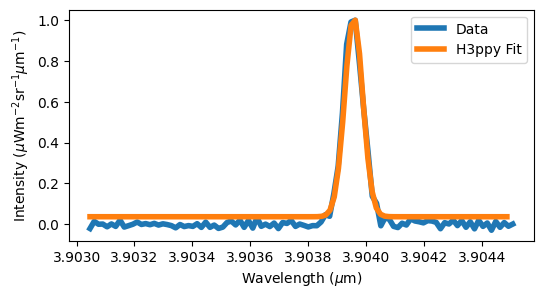

In [45]:
hdulw = fits.open(fits_units_order2)
wavelength1 = hdulw[0].data
wavelength_offset=-0.002114

hdul4 = fits.open(fits_image_order2)
image_data201 = hdul4[0].data
image_data201[~np.isfinite(image_data201)] = 0

#########################
xstart=1800
xend=1900
########################

datawave1=wavelength1[xstart:xend]+wavelength_offset
coadd_int1 = np.mean(image_data201[60:100, xstart:xend],axis=0)

model_h3p1 = h3p.model(density = 1e16, temperature = 1000, R = 50000, wavelength = datawave1)


h3p = h3ppy.h3p()
h3p.set(wavelength = datawave1, data = coadd_int1, density = 1e17, temperature = 900, R = 50000)
h3p.guess_density()

fit = h3p.fit(verbose = False) 

# Use the h3ppy helper functions for the labels
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(datawave1, coadd_int1/np.max(coadd_int1), linewidth = 4, label ="Data")
ax.plot(wave_1, model_h3p1/np.max(model_h3p1), linewidth = 4, label="H3ppy Fit")
ax.set_xlabel(h3p.xlabel())
ax.set_ylabel(h3p.ylabel(prefix = '$\mu$'))
plt.legend()
vars, errs = h3p.get_results()

# Troubleshooting Previous Cell:
The previous cell was coded correctly, the reason it failing to run is due to the solution being numerically unstable. To solve this issue we must combine multiple H3+ emission lines together thereby improving the numerical stablity.

The following cell combines clear H3+ emission lines from 4 of the 9 orders and then calculates Temperature and Column Density.

In [43]:
# Loading each of the orders
hdulw = fits.open(fits_units_order2)
wavelength1 = hdulw[0].data
wavelength_offset=-0.002114
hdul4 = fits.open(fits_image_order2)
image_data201 = hdul4[0].data 
image_data201[~np.isfinite(image_data201)] = 0

hdulw = fits.open(fits_units_order3)
wavelength2 = hdulw[0].data
wavelength_offset_2=0.000388
hdul4 = fits.open(fits_image_order3)
image_data202 = hdul4[0].data
image_data202[~np.isfinite(image_data202)] = 0

hdulw = fits.open(fits_units_order4)
wavelength3 = hdulw[0].data
wavelength_offset_3=0.0004132
hdul4 = fits.open(fits_image_order4)
image_data203 = hdul4[0].data
image_data203[~np.isfinite(image_data203)] = 0

hdulw = fits.open(fits_units_order7)
wavelength4 = hdulw[0].data
wavelength_offset_4=0.000405
hdul4 = fits.open(fits_image_order7)
image_data204 = hdul4[0].data
image_data204[~np.isfinite(image_data204)] = 0

# Defining each of the H3+ emission lines wavelength windows for each specfic lines

#########################
xstart=1800
xend=1900
########################

datawave1=wavelength1[xstart:xend]+wavelength_offset
coadd_int1 = np.mean(image_data201[60:100, xstart:xend],axis=0)

#########################
xstart=1500
xend=1580
########################

datawave2=wavelength2[xstart:xend]+wavelength_offset_2
coadd_int2 = np.mean(image_data202[60:100, xstart:xend],axis=0)

#########################
xstart=1170
xend=1220
########################
datawave3=wavelength3[xstart:xend]+wavelength_offset_3
coadd_int3 = np.mean(image_data203[60:100, xstart:xend],axis=0)

#########################
xstart=1100
xend=1250
########################

datawave4=wavelength4[xstart:xend]+wavelength_offset_4
coadd_int4 = np.mean(image_data204[60:100, xstart:xend],axis=0)

# Combining each of the lines together
fulldatawave = np.concatenate((datawave1,datawave2,datawave3,datawave4))
fullcoadd_int = np.concatenate((coadd_int1,coadd_int2,coadd_int3,coadd_int4))

# Creating a model 
h3p = h3ppy.h3p()
h3p.set(wavelength = fulldatawave, data = fullcoadd_int, density = 1e17, temperature = 900, R = 50000)
h3p.guess_density()

# Fitting the model
fit = h3p.fit(verbose = False) 

# Priting the results
vars, errs = h3p.get_results()

[h3ppy] Estimated density = 7.90E+16 m-2


D:\Apps\anaconda3\Lib\site-packages\h3ppy


[h3ppy]  Spectrum parameters:
         Temperature    = 841.0 +/- 9.0 [K]
         Column density = 9.09E+16 +/-  3.19E+15 [m-2]
         ------------------------------
         background_0 = 1.28E-03 +/- 5.37E-04
         offset_0 = 8.95E-06 +/- 3.74E-07
         sigma_0 = 3.22E-05 +/- 3.83E-07

